# Trader Performance vs Market Sentiment

The objective of this assignment is to:

- Study how market sentiment (Fear / Greed) affects trader performance
- Identify behavioral patterns in trading activity
- Generate data-driven insights that could support smarter trading strategies

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Datasets

In [110]:
fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [111]:
fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [112]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [113]:
fear_greed.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [114]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [115]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [116]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [117]:
# Convert sentiment date
fear_greed["date"] = pd.to_datetime(fear_greed["date"])

# Convert trade timestamp and extract date
trades["Timestamp IST"] = pd.to_datetime(
    trades["Timestamp IST"],
    dayfirst=True,
    errors="coerce"
)

In [120]:

trades["date"] = pd.to_datetime(trades["Timestamp IST"].dt.date)

### Merge the Datasets
The datasets are merged on date so that each trade is associated with the market sentiment of that day.

In [121]:
merged = trades.merge(
    fear_greed[["date", "classification"]],
    on="date",
    how="left"
)
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [122]:
merged["is_profitable"] = merged["Closed PnL"] > 0

# Absolute PnL to understand risk magnitude
merged["abs_pnl"] = merged["Closed PnL"].abs()


### Trade Count by Market Sentiment

In [123]:
merged["classification"].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

* Trading activity is highest during Fear and Greed, and lowest during Extreme Fear, suggesting hesitation during panic phases.

### Performance Metrics by Market Sentiment

In [124]:
summary = merged.groupby("classification").agg(
    avg_pnl=("Closed PnL", "mean"),
    median_pnl=("Closed PnL", "median"),
    win_rate=("is_profitable", "mean"),
    avg_trade_size_usd=("Size USD", "mean"),
    trade_count=("Closed PnL", "count")
).reset_index()


In [125]:
summary["win_rate"] = summary["win_rate"] * 100

In [126]:
print(" Performance summary by market sentiment")
print(summary)


 Performance summary by market sentiment
  classification    avg_pnl  median_pnl   win_rate  avg_trade_size_usd  \
0   Extreme Fear  34.537862         0.0  37.060748         5349.731843   
1  Extreme Greed  67.892861         0.0  46.494299         3112.251565   
2           Fear  54.290400         0.0  42.076750         7816.109931   
3          Greed  42.743559         0.0  38.482794         5736.884375   
4        Neutral  34.307718         0.0  39.699093         4782.732661   

   trade_count  
0        21400  
1        39992  
2        61837  
3        50303  
4        37686  


### Average PnL by Market Sentiment

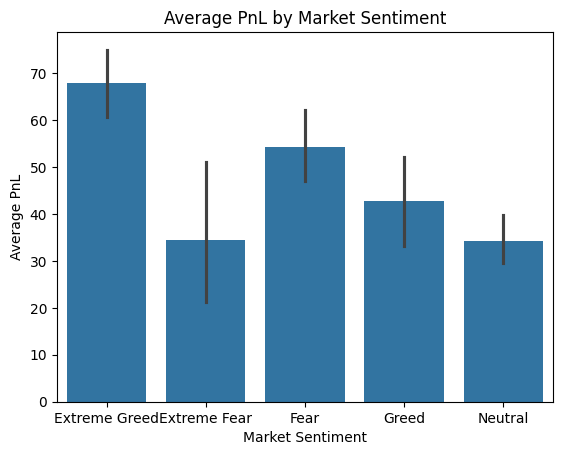

In [127]:
sns.barplot(
    data=merged,
    x="classification",
    y="Closed PnL",
    estimator=np.mean
)
plt.title("Average PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")
plt.show()


Insight:
- Extreme Greed has the highest average PnL.
- Profitability drops during Neutral and Extreme Fear periods.

Interpretation:
- Bullish market conditions often reward traders already positioned in the market.
- However, this profitability may be concentrated among disciplined traders, while others may still lose.

### Win Rate by Market Sentiment

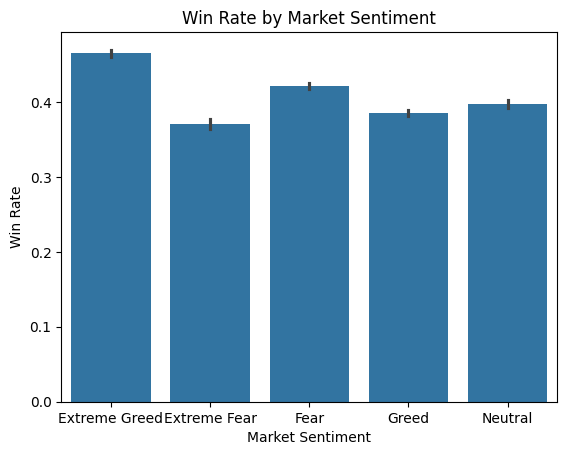

In [128]:
sns.barplot(
    data=merged,
    x="classification",
    y="is_profitable",
    estimator=np.mean
)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.show()


Insight:
- Win rate is highest during Extreme Greed.
- Win rate drops significantly during Extreme Fear.

Interpretation :
- During Extreme Fear, emotional decisions and forced exits reduce trade success.
- Greed phases favor momentum-based strategies.

### Number of Trades by Market Sentiment

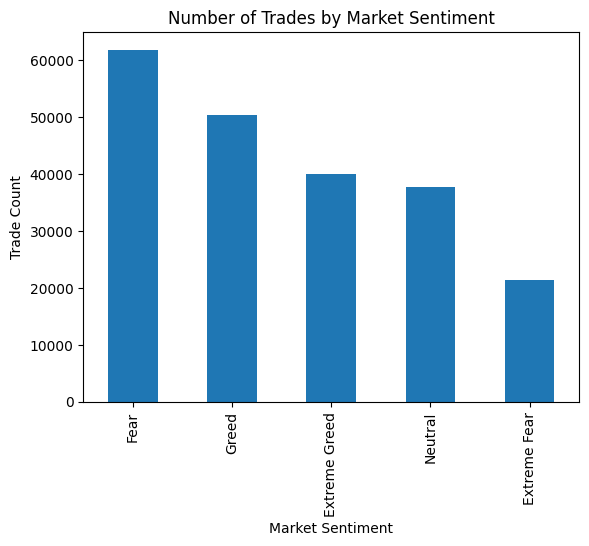

In [129]:
merged["classification"].value_counts().plot(kind="bar")
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.show()


Insight:
- The highest number of trades occurs during Fear, followed by Greed.
- Extreme Fear shows the lowest trading activity among all sentiment categories

Interpretation:
- During Fear, traders tend to be highly active, possibly due to panic selling, stop-loss triggers, or attempts to buy perceived dips.
- Greed also encourages frequent trading, likely driven by optimism and short-term profit-taking.

### Trade Size Distribution

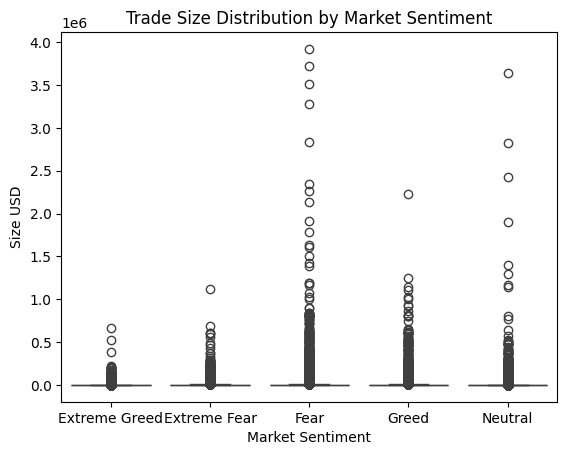

In [130]:
sns.boxplot(
    data=merged,
    x="classification",
    y="Size USD"
)
plt.title("Trade Size Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.show()


Insight:
- Trades during Fear have the largest average size.
- Trades during Greed and Extreme Greed are smaller on average.

Interpretation:
- Traders take larger risk per trade during Fear, possibly attempting to buy dips.
- Greed encourages frequent, smaller trades, indicating overtrading behavior.

# Final Observation

- Market sentiment strongly influences trader behavior.
- Fear leads to larger but riskier positions, while greed leads to frequent but smaller trades.
- Extreme fear is the least favorable condition for trading performance.